<a href="https://colab.research.google.com/github/jyotidabass/Heart-disease-prediction-algorithms/blob/main/Prediction_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/markmacwan/Heart-Failure-Prediction.git

Cloning into 'Heart-Failure-Prediction'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 35 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Heart-Failure-Prediction/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
262,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1
198,50.0,1,582,1,20,1,279000.00,1.00,134,0,0,186,0
199,60.0,0,1211,1,35,0,263358.03,1.80,113,1,1,186,0
235,77.0,1,109,0,50,1,406000.00,1.10,137,1,0,209,0
182,65.0,0,395,1,25,0,265000.00,1.20,136,1,1,154,1
233,53.0,1,707,0,38,0,330000.00,1.40,137,1,1,209,0
38,60.0,0,2656,1,30,0,305000.00,2.30,137,1,0,30,0
290,45.0,0,615,1,55,0,222000.00,0.80,141,0,0,257,0
153,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0
221,65.0,0,118,0,50,0,194000.00,1.10,145,1,1,200,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
X.shape, y.shape

((299, 12), (299,))

In [ ]:
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### We can see that the target class in the data set is imbalanced and thus it would result in overfitting the 0 class.

### In order to overcome this, we would use the re-sampling technique to perform over-sampling of minority class (in this case 1).

### SMOTE: Synthetic Minority Over-sampling Technique

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:

oversample = SMOTE()
X_smote,y_smote = oversample.fit_resample(X, y)
y_smote.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, stratify = y_smote, test_size=0.25, random_state=69)

In [ ]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (304, 12)
Shape of X_test: (102, 12)
Shape of y_train: (304,)
Shape of y_test: (102,)


## Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.87      0.78      0.82        51
           1       0.80      0.88      0.84        51

    accuracy                           0.83       102
   macro avg       0.84      0.83      0.83       102
weighted avg       0.84      0.83      0.83       102



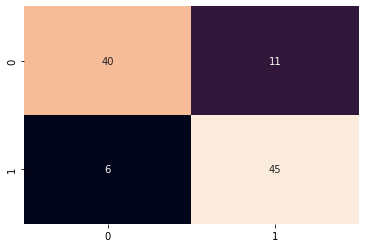

In [ ]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

In [ ]:
acclist = []
ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear')
model = svc.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        51
           1       0.76      0.88      0.82        51

    accuracy                           0.80       102
   macro avg       0.81      0.80      0.80       102
weighted avg       0.81      0.80      0.80       102



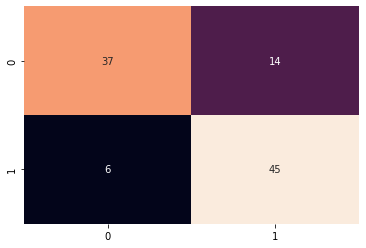

In [ ]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
model = dt.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        51
           1       0.78      0.92      0.85        51

    accuracy                           0.83       102
   macro avg       0.84      0.83      0.83       102
weighted avg       0.84      0.83      0.83       102



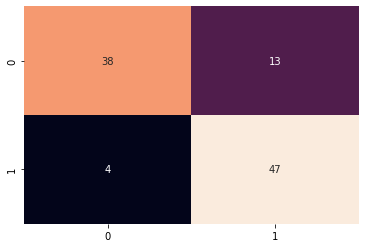

In [ ]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=55)
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        51
           1       0.89      0.92      0.90        51

    accuracy                           0.90       102
   macro avg       0.90      0.90      0.90       102
weighted avg       0.90      0.90      0.90       102



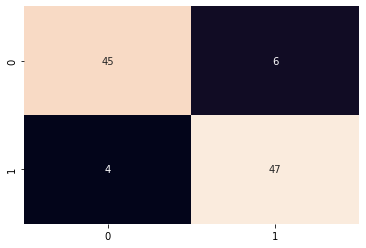

In [ ]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()
model = gb.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        51
           1       0.90      0.92      0.91        51

    accuracy                           0.91       102
   macro avg       0.91      0.91      0.91       102
weighted avg       0.91      0.91      0.91       102



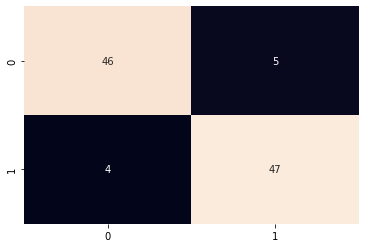

In [ ]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

## k-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

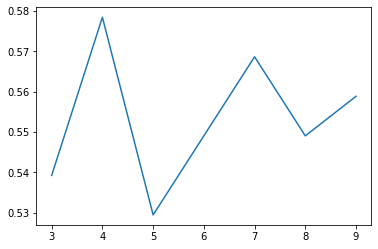

In [ ]:
# Finding optimum number of neighbors

lst = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    lst.append(accuracy_score(y_test,y_pred))

plt.plot((range(3,10)), lst)
plt.show()

In [ ]:
#Training the kNN on training set with 4 neighbors

classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.56      0.71      0.63        51
           1       0.61      0.45      0.52        51

    accuracy                           0.58       102
   macro avg       0.58      0.58      0.57       102
weighted avg       0.58      0.58      0.57       102



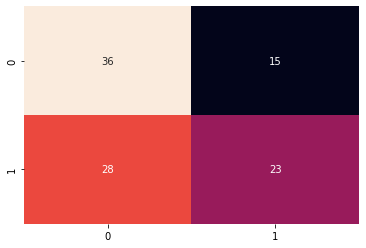

In [ ]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [ ]:
acclist

[0.8333333333333334,
 0.803921568627451,
 0.8333333333333334,
 0.9019607843137255,
 0.9117647058823529,
 0.5784313725490197]

In [ ]:
models = ['Logistic Regression','SVM','Decision Tree','Random Forest', 'Gradient Boosting', 'kNN']

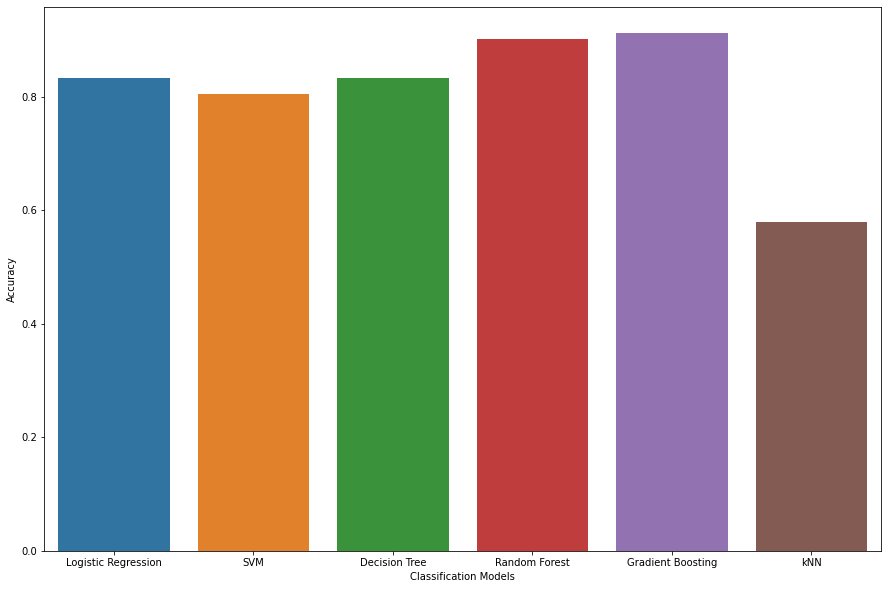

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=models, y=acclist)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()